### Setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv('C:/Users/iamzz/OneDrive/바탕 화면/Internship/Ecoservant/May-13-2025_Aug-10-2025_FB.csv')
ig = pd.read_csv('C:/Users/iamzz/OneDrive/바탕 화면/Internship/Ecoservant/May-16-2025_Aug-13-2025_IG.csv')
dfb = pd.DataFrame(fb) 
dig = pd.DataFrame(ig)


In [3]:
#print(dfb.head())
#dfb.dtypes
dig.head(5)

,Post ID,Account ID,Account username,Account name,Description,Duration (sec),Publish time,Permalink,Post type,Data comment,Date,Views,Reach,Likes,Shares,Follows,Comments,Saves
0,1.790210e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,https://ecoservantsproject.org/aah/#rsvp,20,5/19/2025 17:09,https://www.instagram.com/reel/DJ2s7gRPjsL/,IG reel,NaN,Lifetime,3478,2079,5,0,0,0,0
1,1.808260e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,Wetlands 101:\n\nWhat are they?\nAll wetland c...,0,8/2/2025 7:07,https://www.instagram.com/p/DM2vr3CBYJe/,IG carousel,NaN,Lifetime,59,18,4,0,0,0,0
2,1.840930e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,One person can make a difference. 🙌💚\nYesterda...,0,7/27/2025 20:04,https://www.instagram.com/p/DMor06xR6qt/,IG carousel,NaN,Lifetime,164,38,11,0,0,1,1
3,1.830590e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,"Whether you’re hiking, camping, walking, or bi...",0,7/22/2025 14:00,https://www.instagram.com/p/DMbKNZoveZm/,IG carousel,NaN,Lifetime,124,23,5,1,0,0,1
4,1.813890e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,🌱 Success isn’t random—it’s rooted in the proc...,0,7/21/2025 12:05,https://www.instagram.com/p/DMYYUpNyqj5/,IG image,NaN,Lifetime,83,9,2,0,0,0,0


### Data Cleaning

In [4]:
dfb['Publish time'] = pd.to_datetime(dfb['Publish time'], errors = 'coerce')
dig['Publish time'] = pd.to_datetime(dig['Publish time'], errors = 'coerce')

In [5]:
#dfb.dtypes
dig.dtypes

Post ID                    float64
Account ID                 float64
Account username            object
Account name                object
Description                 object
Duration (sec)               int64
Publish time        datetime64[ns]
Permalink                   object
Post type                   object
Data comment               float64
Date                        object
Views                        int64
Reach                        int64
Likes                        int64
Shares                       int64
Follows                      int64
Comments                     int64
Saves                        int64
dtype: object

### Engagement Rate

In [6]:
dfb['FB Engagement Rate'] = dfb['Reactions, Comments and Shares']/dfb['Reach']
dig['IG Engagement Rate'] = (dig['Likes'] + dig['Comments'] + dig['Shares'] + dig['Saves']) / dig['Reach']

dig.head()

,Post ID,Account ID,Account username,Account name,Description,Duration (sec),Publish time,Permalink,Post type,Data comment,Date,Views,Reach,Likes,Shares,Follows,Comments,Saves,IG Engagement Rate
0,1.790210e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,https://ecoservantsproject.org/aah/#rsvp,20,2025-05-19 17:09:00,https://www.instagram.com/reel/DJ2s7gRPjsL/,IG reel,NaN,Lifetime,3478,2079,5,0,0,0,0,0.002405
1,1.808260e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,Wetlands 101:\n\nWhat are they?\nAll wetland c...,0,2025-08-02 07:07:00,https://www.instagram.com/p/DM2vr3CBYJe/,IG carousel,NaN,Lifetime,59,18,4,0,0,0,0,0.222222
2,1.840930e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,One person can make a difference. 🙌💚\nYesterda...,0,2025-07-27 20:04:00,https://www.instagram.com/p/DMor06xR6qt/,IG carousel,NaN,Lifetime,164,38,11,0,0,1,1,0.342105
3,1.830590e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,"Whether you’re hiking, camping, walking, or bi...",0,2025-07-22 14:00:00,https://www.instagram.com/p/DMbKNZoveZm/,IG carousel,NaN,Lifetime,124,23,5,1,0,0,1,0.304348
4,1.813890e+16,1.784150e+16,ecoservants_project,Ecological Servants Project,🌱 Success isn’t random—it’s rooted in the proc...,0,2025-07-21 12:05:00,https://www.instagram.com/p/DMYYUpNyqj5/,IG image,NaN,Lifetime,83,9,2,0,0,0,0,0.222222


In [7]:
fb_mean_engagement_rate = round(dfb['FB Engagement Rate'].mean() * 100, 2)
ig_mean_engagement_rate = round(dig['IG Engagement Rate'].mean() * 100, 2)
print(f"The mean engagement rate of Facebook posting is: {fb_mean_engagement_rate}%, The mean engagement rate of Instagram Posting is: {ig_mean_engagement_rate}%")

The mean engagement rate of Facebook posting is: 1.53%, The mean engagement rate of Instagram Posting is: 17.53%


### Total Views per Each Hour

In [8]:
dfb['Publish time']

fbha = dfb.groupby(dfb['Publish time'].dt.hour)['Views'].sum() #Reach number group by each hour segment, sum of reach aligned with publish time

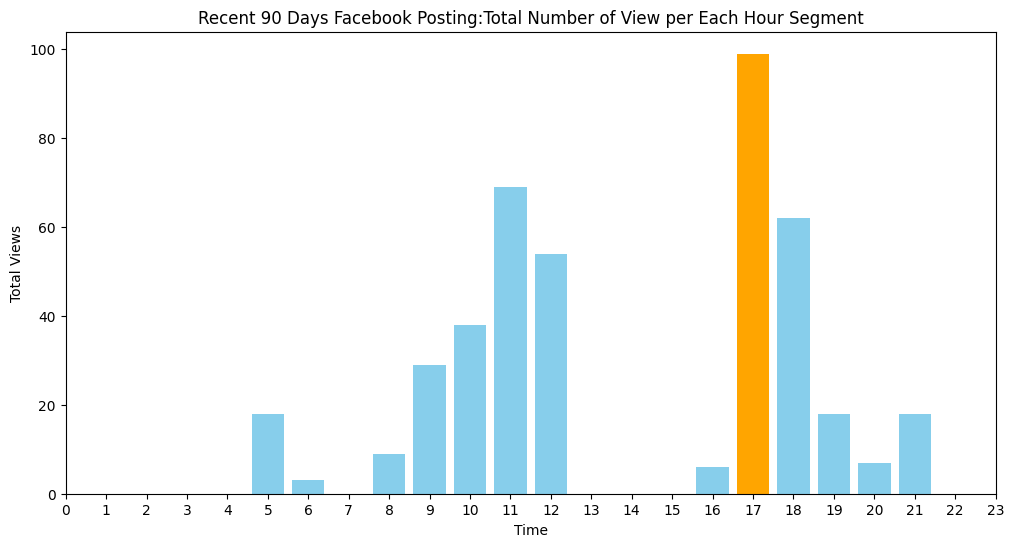

In [9]:
maxhr_fb = fbha.idxmax()
maxhr_fb
colors = ['orange' if hour == maxhr_fb else 'skyblue' for hour in fbha.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(fbha.index, fbha, color = colors)
plt.title('Recent 90 Days Facebook Posting:Total Number of View per Each Hour Segment')
plt.xlabel('Time')
plt.ylabel('Total Views')
plt.xticks(range(0, 24)) 


plt.show()

In [10]:
dig['Publish time']

igha = dig.groupby(dig['Publish time'].dt.hour)['Views'].sum() #Reach number group by each hour segment, sum of reach aligned with publish time

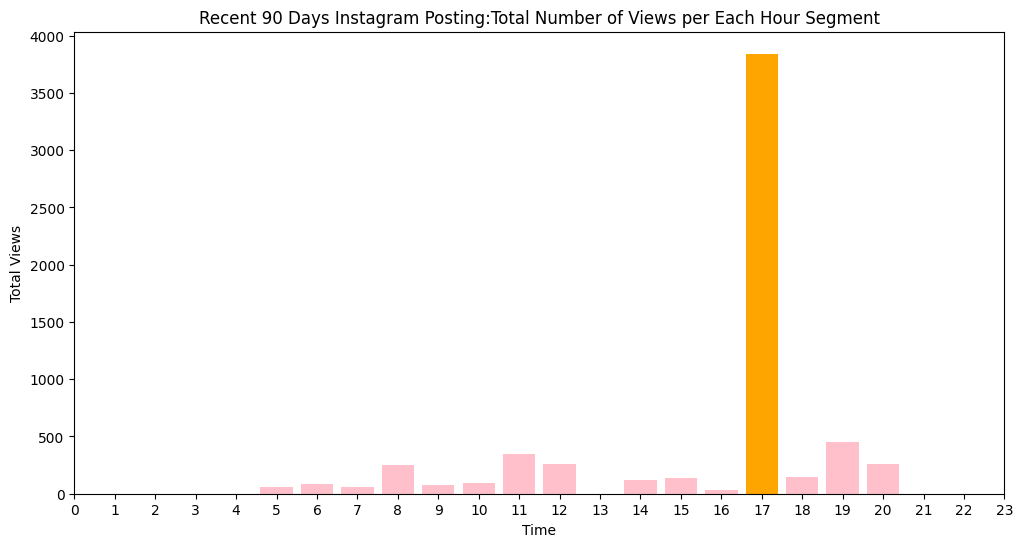

In [11]:
maxhr_ig = igha.idxmax()
maxhr_ig
colors = ['orange' if hour == maxhr_ig else 'pink' for hour in igha.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(igha.index, igha, color = colors)
plt.title('Recent 90 Days Instagram Posting:Total Number of Views per Each Hour Segment')
plt.xlabel('Time')
plt.ylabel('Total Views')
plt.xticks(range(0, 24)) 


plt.show()

### Average View per Post Type

In [12]:
#fbpt = dfb.groupby(dfb['Post type'])['Views from Organic posts'].sum()
fbpt = dfb.groupby(dfb['Post type'])['Views from Organic posts'].mean()
fbpt

Post type
Links      7.000000
Photos    13.909091
Reels     14.250000
Text       0.000000
Videos    14.750000
Name: Views from Organic posts, dtype: float64

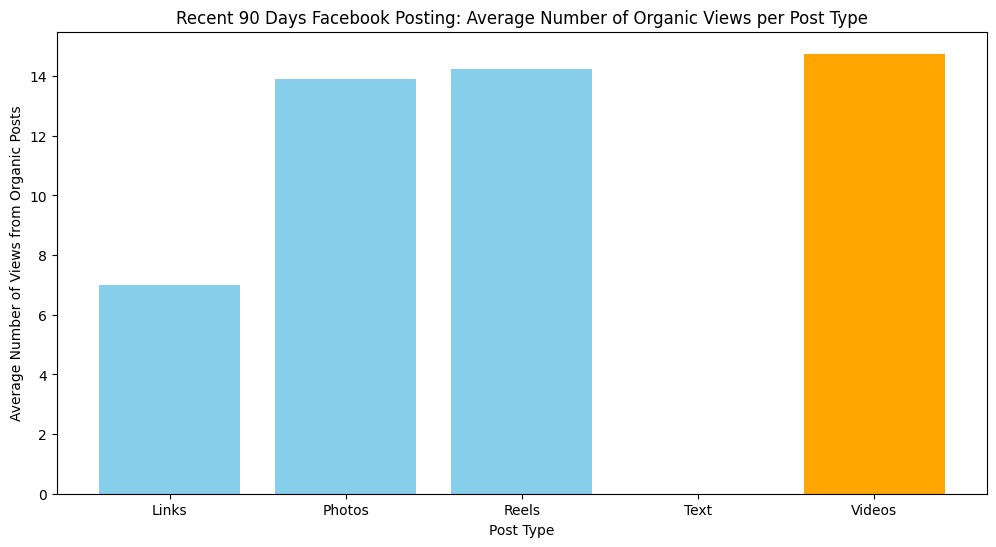

In [13]:
maxmean_fb = fbpt.idxmax()
maxmean_fb
colors = ['orange' if hour == maxmean_fb else 'skyblue' for hour in fbpt.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(fbpt.index, fbpt, color = colors)
plt.title('Recent 90 Days Facebook Posting: Average Number of Organic Views per Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Number of Views from Organic Posts')



plt.show()

In [14]:
#igpt = dig.groupby(dig['Post type'])['Views'].sum()
igpt = dig.groupby(dig['Post type'])['Views'].mean()
igpt

Post type
IG carousel     84.714286
IG image        49.636364
IG reel        645.857143
Name: Views, dtype: float64

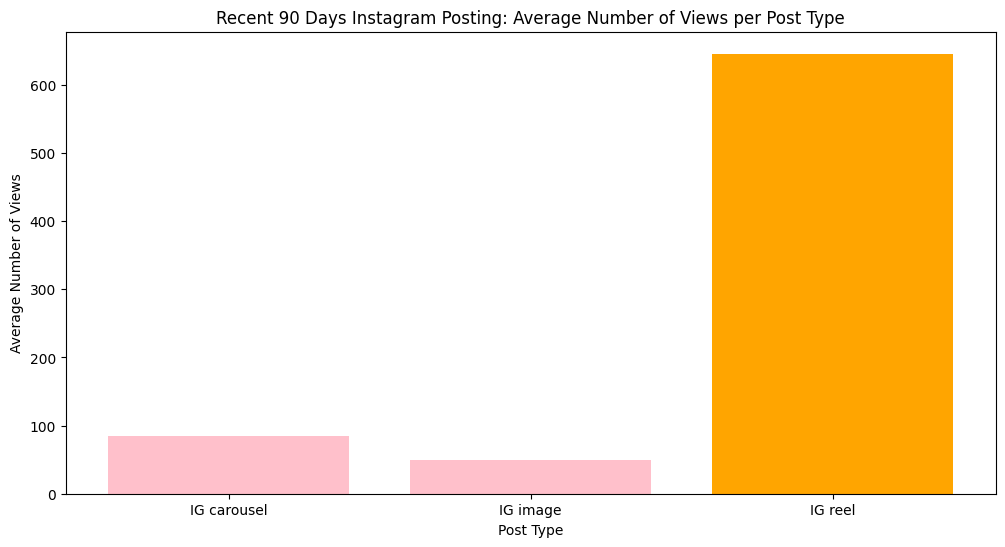

In [15]:
maxmean_ig = igpt.idxmax()
maxmean_ig
colors = ['orange' if hour == maxmean_ig else 'pink' for hour in igpt.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(igpt.index, igpt, color = colors)
plt.title('Recent 90 Days Instagram Posting: Average Number of Views per Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Number of Views')



plt.show()

In [16]:
igpt_ct = dig.groupby(dig['Post type'])['Views'].count()
igpt_ct

Post type
IG carousel     7
IG image       22
IG reel         7
Name: Views, dtype: int64

### Filter for Organic & Paid Posts

##### View

In [17]:
mean_view= dig['Views'].mean()
std_view = dig['Views'].std()
#filtered_df = 
dig['Views'] >= mean_view + 2*std_view # mean +- 2σ (sigma) range: approximately 95% of the data, 
#outlier represents the top 2.5%, which is an extremely high value

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
Name: Views, dtype: bool

In [18]:
mean_view= dig['Views'].mean()
std_view = dig['Views'].std()
#filtered_df = 
dig['Views'] >= mean_view + 2*std_view # mean +- 2σ (sigma) range: approximately 95% of the data, 
#outlier represents the top 2.5%, which is an extremely high value

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
Name: Views, dtype: bool

In [19]:
paidv_dig = dig[dig['Views'] >= mean_view + 2*std_view] 
orgv_dig = dig[dig['Views'] < mean_view + 2*std_view]

##### Reach

In [20]:
mean_reach = dig['Reach'].mean()
std_reach = dig['Reach'].std()
#filtered_df = 
dig['Reach'] >= mean_reach + 2*std_reach # mean +- 2σ (sigma) range: approximately 95% of the data, 
#outlier represents the top 2.5%, which is an extremely high value

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
Name: Reach, dtype: bool

In [21]:
paidreach_dig = dig[dig['Reach'] >= mean_reach + 2*std_reach]
orgreach_dig = dig[dig['Reach'] < mean_reach + 2*std_reach]

### Revised View per Hour

In [22]:
orgv_dig['Publish time']

orgv_igha = orgv_dig.groupby(orgv_dig['Publish time'].dt.hour)['Views'].sum() #Reach number group by each hour segment, sum of reach aligned with publish time

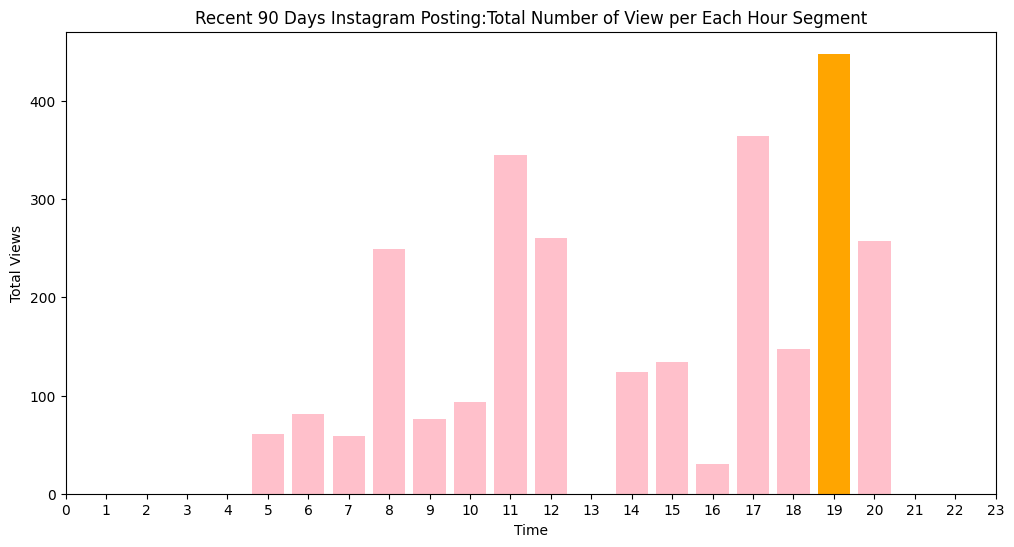

In [23]:
orgv_maxhr_ig = orgv_igha.idxmax()
orgv_maxhr_ig
colors = ['orange' if hour == orgv_maxhr_ig else 'pink' for hour in orgv_igha.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(orgv_igha.index, orgv_igha, color = colors)
plt.title('Recent 90 Days Instagram Posting:Total Number of View per Each Hour Segment')
plt.xlabel('Time')
plt.ylabel('Total Views')
plt.xticks(range(0, 24)) 


plt.show()

#### Revised View per Post type

In [24]:
#igpt = dig.groupby(dig['Post type'])['Views'].sum()
origpt = orgreach_dig.groupby(orgreach_dig['Post type'])['Views'].mean()
origpt

Post type
IG carousel     84.714286
IG image        49.636364
IG reel        173.833333
Name: Views, dtype: float64

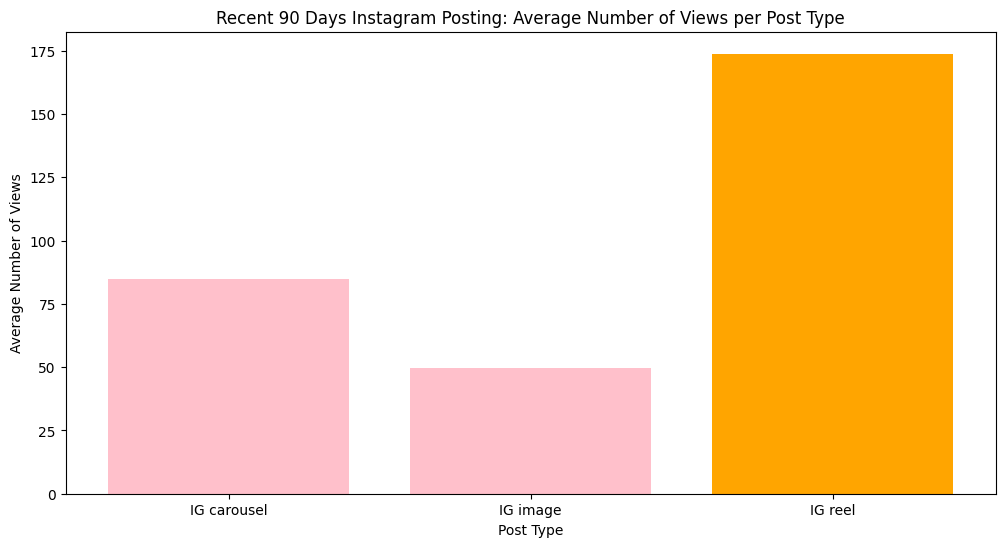

In [25]:
maxmean_ig = origpt.idxmax()
maxmean_ig
colors = ['orange' if hour == maxmean_ig else 'pink' for hour in igpt.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(origpt.index, origpt, color = colors)
plt.title('Recent 90 Days Instagram Posting: Average Number of Views per Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Number of Views')



plt.show()

#### Reach Vs Hour

In [46]:
dfb['Publish time']

fbha_reach = dfb.groupby(dfb['Publish time'].dt.hour)['Reach'].sum() #Reach number group by each hour segment, sum of reach aligned with publish time

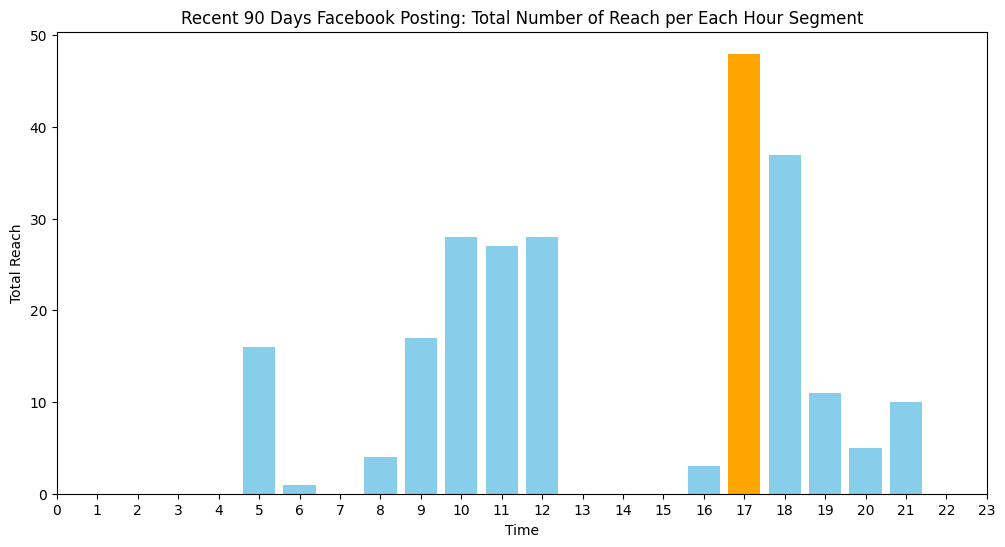

In [47]:
maxhr_fb__reach = fbha_reach.idxmax()

colors = ['orange' if hour == maxhr_fb__reach else 'skyblue' for hour in fbha_reach.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(fbha_reach.index, fbha_reach, color = colors)
plt.title('Recent 90 Days Facebook Posting: Total Number of Reach per Each Hour Segment')
plt.xlabel('Time')
plt.ylabel('Total Reach')
plt.xticks(range(0, 24)) 


plt.show()

In [48]:
orgv_dig['Publish time']

orgv_igha_reach = orgv_dig.groupby(orgv_dig['Publish time'].dt.hour)['Reach'].sum() #Reach number group by each hour segment, sum of reach aligned with publish time

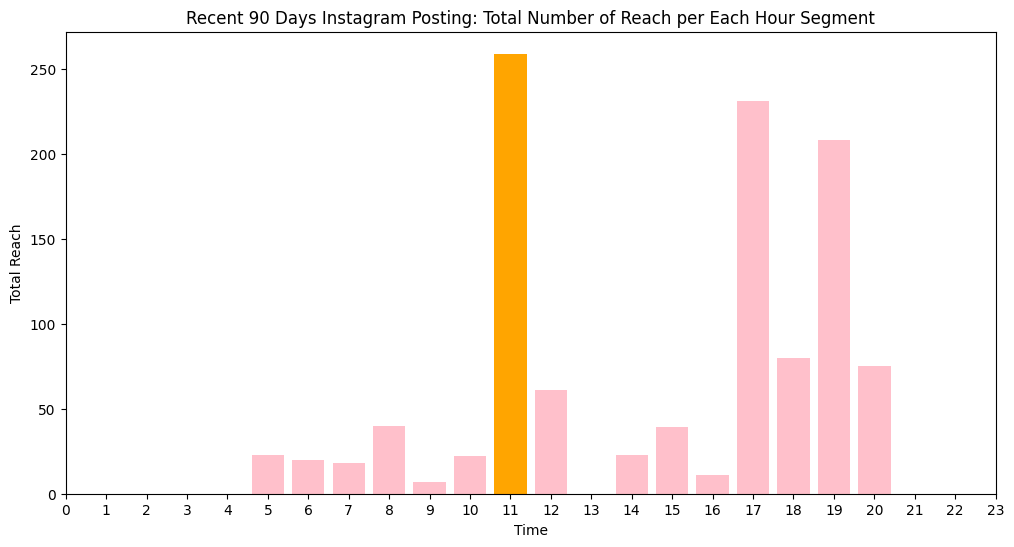

In [49]:
orgv_reach_maxhr_ig = orgv_igha_reach.idxmax()
colors = ['orange' if hour == orgv_reach_maxhr_ig else 'pink' for hour in orgv_igha.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(orgv_igha_reach.index, orgv_igha_reach, color = colors)
plt.title('Recent 90 Days Instagram Posting: Total Number of Reach per Each Hour Segment')
plt.xlabel('Time')
plt.ylabel('Total Reach')
plt.xticks(range(0, 24)) 


plt.show()

#### Reach vs Type of Post

In [30]:
#fbpt = dfb.groupby(dfb['Post type'])['Views from Organic posts'].sum()
fbpt_reach = dfb.groupby(dfb['Post type'])['Reach'].mean()
fbpt_reach

Post type
Links      5.000000
Photos     6.590909
Reels     11.000000
Text            NaN
Videos    10.250000
Name: Reach, dtype: float64

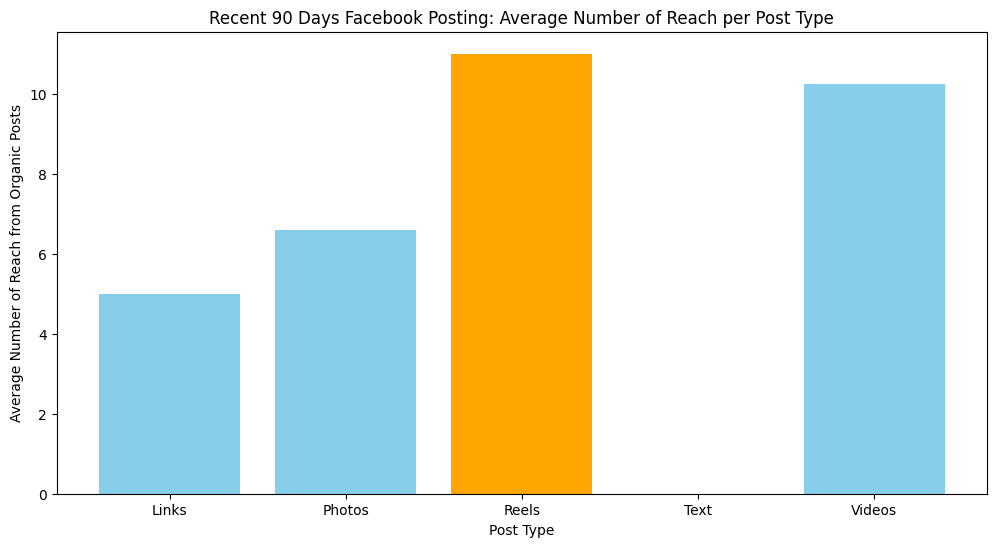

In [50]:
maxmean_fb_reach = fbpt_reach.idxmax()
maxmean_fb_reach
colors = ['orange' if hour == maxmean_fb_reach else 'skyblue' for hour in fbpt_reach.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(fbpt_reach.index, fbpt_reach, color = colors)
plt.title('Recent 90 Days Facebook Posting: Average Number of Reach per Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Number of Reach from Organic Posts')



plt.show()

In [36]:

orgreach_dig = orgreach_dig.groupby(orgreach_dig['Post type'])['Reach'].mean()
orgreach_dig

Post type
IG carousel     20.428571
IG image        11.272727
IG reel        121.000000
Name: Reach, dtype: float64

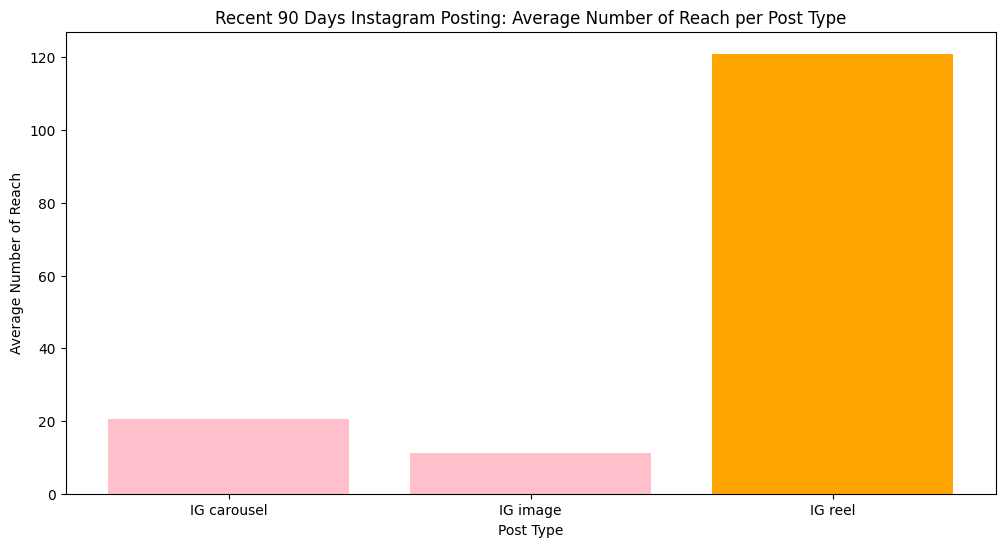

In [40]:
maxmean_ig_reach = orgreach_dig.idxmax()
maxmean_ig_reach
colors = ['orange' if hour == maxmean_ig_reach else 'pink' for hour in orgreach_dig.index] #Highest reach highlights

plt.figure(figsize=(12, 6))
plt.bar(orgreach_dig.index, orgreach_dig, color = colors)
plt.title('Recent 90 Days Instagram Posting: Average Number of Reach per Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Number of Reach')



plt.show()


